In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [3]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['percentage'] = pd.to_numeric(data['percentage'], errors='coerce')

In [4]:
data = data[["year", "value"]].copy()
data

,year,value
0,2010,350.0
1,2010,NaN
2,2010,3.0
3,2010,7.0
4,2010,62.0
...,...,...
12649,2035,55.0
12650,2035,31.0
12651,2035,9400000.0
12652,2035,15000000.0


In [5]:
data.dropna(inplace = True)

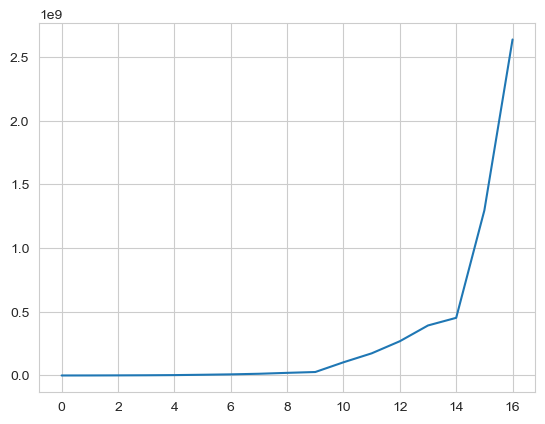

In [9]:
data = data.groupby("year").sum().reset_index()
data["value"].plot()
plt.show()

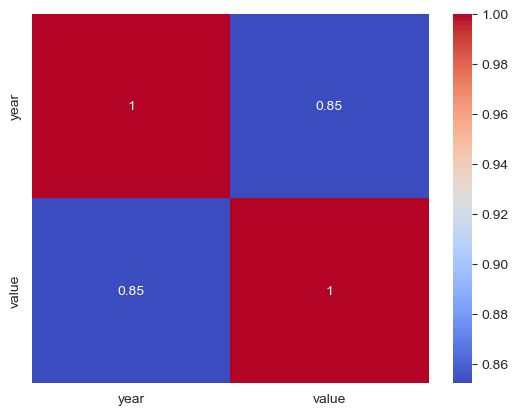

In [10]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
X = data[["year"]]
y = data["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
model = LinearRegression().fit(X, y)

In [16]:
model.score(X, y)

0.7264400547459171